 # SUPERMARKET SALES DATASET
  SOURCE: KAGGLE 


### Outline of this Notebook:
### 1.Comprehending the Business Context
### 2.Understanding the Data
### 3.Cleaning the Data
### 4.Conducting Exploratory Data Analysis (EDA)
### 5.Performing Predictive Analysis

## 1.Comprehending the Business Context
I have been entrusted with a comprehensive dataset that encapsulates the sales transactions occurring at a supermarket. This dataset is a rich source of information, comprising 1,000 individual entries, each representing a unique transaction. These entries are further divided into 17 distinct columns, each column representing a specific attribute related to the sales transactions. The attributes could range from the type of product sold, the quantity, the time of purchase, to the demographics of the customer, among others. This structured and detailed organization of data provides an invaluable opportunity to delve deep into the various aspects of supermarket sales. It allows for a thorough analysis and understanding of sales patterns, customer behavior, popular products, peak shopping times, and so much more. The insights derived from this dataset could be instrumental in driving strategic business decisions, optimizing operations, and enhancing customer satisfaction in the supermarket industry.

## 2. Understanding the Data
A detailed examination of the dataset columns and their meanings:

- **Invoice ID:** A unique code generated by the system for each sales transaction.
  
- **Branch:** Denotes the specific supermarket branch (A, B, or C) where the transaction occurred.
  
- **City:** Specifies the city or location of the supermarket branch.
  
- **Customer Type:** Classifies customers into “Member” (those using a member card) or “Normal” (those without a member card).
  
- **Gender:** Indicates the customer’s gender, recorded as either “Male” or “Female.”
  
- **Product Line:** Categorizes items into groups such as “Electronic Accessories,” “Fashion Accessories,” “Food and Beverages,” “Health and Beauty,” “Home   and Lifestyle,” and “Sports and Travel.”
  
- **Unit Price:** The cost of each product in dollars .
  
- **Quantity:** The number of products bought by the customer.
  
- **Tax 5%:** A 5% tax fee added to the customer’s purchase.
  
- **Total:** The overall price of the purchase, inclusive of the 5% tax.
  
- **Date:** The purchase date, recorded between January 2019 and March 2019.
  
- **Time:** The time of the purchase, recorded between 10:00 AM and 9:00 PM.
  
- **Payment:** The payment method used by the customer, which could be “Cash,” “Credit Card,” or “Ewallet.”
  
- **COGS (Cost of Goods Sold):** The cost incurred for the products sold, in dollars ($).
  
- **Gross Margin Percentage:** A column that contains the gross margin percentage, which seems to be a constant value of approximately 4.76% for all entries.
  
- **Gross Income:** The income generated from the purchase.
  
- **Rating:** The customer’s satisfaction rating of their shopping experience, recorded on a scale from 1 to 10.
  







## 3.Cleaning the Data

In [51]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel
import warnings
import seaborn as sns
import datetime as dt
import joblib
from tkinter import *
# Suppress XGBoost warning about is_sparse
warnings.filterwarnings("ignore", message="is_sparse is deprecated", category=FutureWarning)


In [52]:
#loading dataset
df=pd.read_csv(r'C:\Users\scypher\Desktop\python projects\supermarket_sales - Sheet1.csv')
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [53]:
df.shape

(1000, 17)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [55]:
df.columns 

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [56]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [57]:
#checking for missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [58]:
df.duplicated().sum()

0

from the above results we see that there are no missing values or duplicates in my dataframe

### 4. Conducting Exploratory Data Analysis (EDA)
 I will be carrying out 2 majour analysis which are :
 #### 4.1- PRODUCT ANALYSIS
 #### 4.2-CUSTOMER ANALYSIS
  Prior to initiating my analysis, I will discard certain columns that are not pertinent to my study. These columns include **‘Invoice ID’** and **‘gross margin percentage’**. The rationale for excluding these specific columns is based on the particular objectives and prerequisites of sales forecasting. Here are the justifications for each column exclusion:

- **‘Invoice ID’:** Generally, ‘Invoice ID’ serves as a distinct identifier for every sales transaction. However, it doesn’t offer any substantial information for predicting sales. Its primary function is for record-keeping and it lacks predictive influence over the sales volume.
- **‘gross margin percentage’:** In instances where ‘gross margin percentage’ maintains a constant value (for example, the same value across all entries), it fails to provide any beneficial information for forecasting as it lacks variation among data points. Therefore, it can be safely discarded without impacting the predictive capacity of the model.**
  

In [59]:
#before removing unnecessary columns i first create a copy of my dataframe
dfc=df.copy(deep=True)
dfc

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [60]:
dfc.columns 

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [61]:
# removing unnecessary columns
dfc.drop(['Invoice ID','gross margin percentage'], axis=1, inplace=True)

In [62]:
dfc


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1


 #### 4.1- PRODUCT ANALYSIS:
 In this analysis, I will be addressing the following points:

- Identifying the product with the highest sales volume
- Determining the product with the topmost rating
- Discovering the product that generated the maximum gross income
- Finding out which branch recorded the highest sales
- Establishing the most popular product in each branch





- ###  Identifying the product with the highest sales volume

In [63]:
#which product was most sold
dfc_most_sold=dfc.groupby('Product line').Quantity.sum().sort_values(ascending=False)
dfc_most_sold

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

<Axes: xlabel='Quantity', ylabel='Product line'>

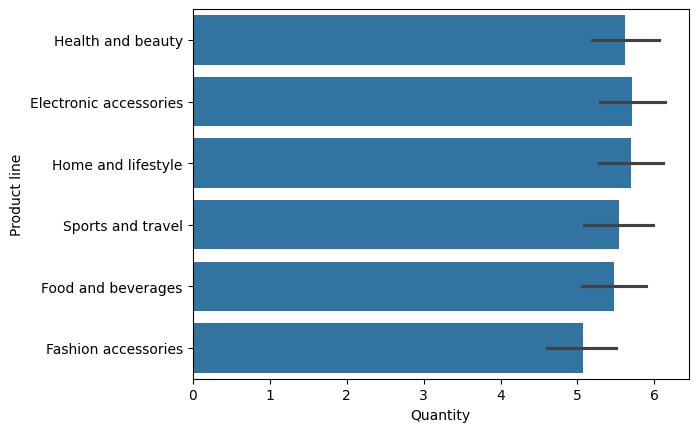

In [64]:
#visual reprensentation of most sold product
sns.barplot(data=dfc,y='Product line', x='Quantity')

 the graph above clearly shows the most overall quantity of product sold with 'electronic accessories' being the most sold and 'fashion accessories' being the least

- ### Determining the product with the topmost rating

In [65]:
dfc_Higest_rating=dfc.groupby('Product line').Rating.sum().sort_values(ascending=False)
dfc_Higest_rating                                                                       
                                                                      

Product line
Fashion accessories       1251.2
Food and beverages        1237.7
Electronic accessories    1177.2
Sports and travel         1148.1
Home and lifestyle        1094.0
Health and beauty         1064.5
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Product line'>

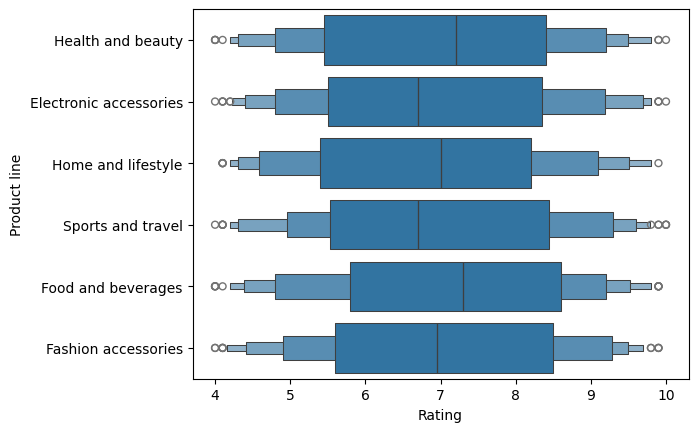

In [66]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=dfc )


Food and Beverages have the highest average rating while sports and travel the lowest

- ###  Discovering the product that generated the maximum gross income

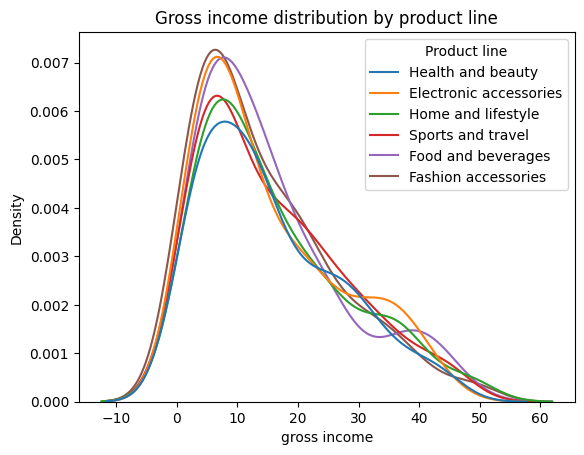

In [67]:
sns.kdeplot(data=dfc, x='gross income', hue='Product line')
plt.title('Gross income distribution by product line')
plt.show()

### Most of income comes from Fashion accessories. In contrast, Health and beauty is the lowest

- ### Finding out which branch recorded the highest sales

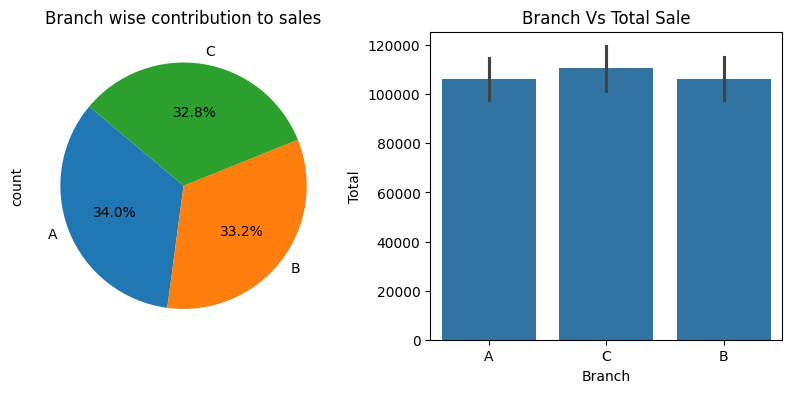

In [68]:
#visualising the number of sales made by each branch
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
dfc['Branch'].value_counts()
dfc['Branch'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=140)
plt.axis() 
plt.title('Branch wise contribution to sales')

plt.subplot(1,2,2)
#visualising the total sales of each branch
sns.barplot(data=dfc,x='Branch',y='Total',estimator='sum')
plt.title('Branch Vs Total Sale')
plt.show()

<Axes: xlabel='Branch', ylabel='Total'>

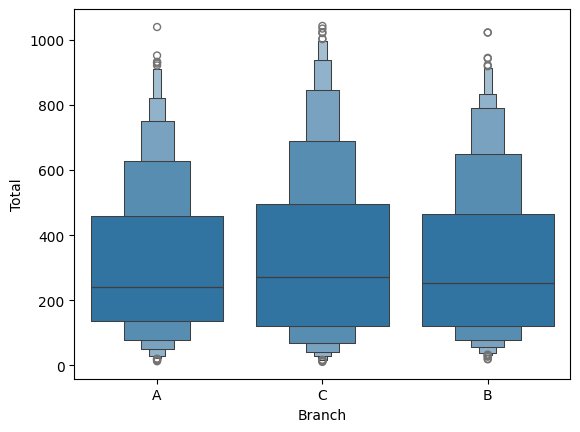

In [69]:
sns.boxenplot(y = 'Total', x = 'Branch', data=dfc )

the two plots above tells us that branch C has the highest average sale and overall highest sale

- ### Establishing the most popular product in each branch

In [70]:
#dfc.groupby(['Branch','Product line']).value_counts()
dfc.groupby(['Product line', 'Branch'], observed=False)['Quantity'].sum()

Product line            Branch
Electronic accessories  A         322
                        B         316
                        C         333
Fashion accessories     A         263
                        B         297
                        C         342
Food and beverages      A         313
                        B         270
                        C         369
Health and beauty       A         257
                        B         320
                        C         277
Home and lifestyle      A         371
                        B         295
                        C         245
Sports and travel       A         333
                        B         322
                        C         265
Name: Quantity, dtype: int64

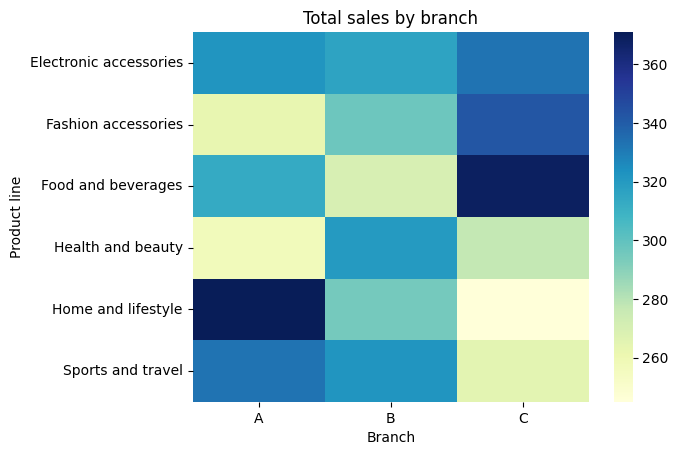

In [71]:
sum_byBranch = dfc.groupby(['Product line', 'Branch'], observed=False)['Quantity'].sum()
sum_byBranch = sum_byBranch.unstack().fillna(0)

sns.heatmap(data=sum_byBranch, cmap='YlGnBu')
plt.title('Total sales by branch')
plt.show()

 ###  *Branch A* has the highest sales in **Home and lifestyle**, **Electronic accessories**
 ###  *Branch C* has the highest sales in **Food and beverages**, **Fashion accessories**. In contrast, it has the lowest sales in **Sports and travel**, **Home and lifestyle**, and **Health and beauty**

 ### 4.2-CUSTOMER ANALYSIS:
In the customer analysis, I will be shedding light on the following aspects:

- The volume of sales attributed to each type of customer
- The distribution of sales across different genders
- The payment method that is most frequently utilized





In [72]:
dfc


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1


- ### The volume of sales attributed to each type of customer

<Axes: xlabel='Total', ylabel='Quantity'>

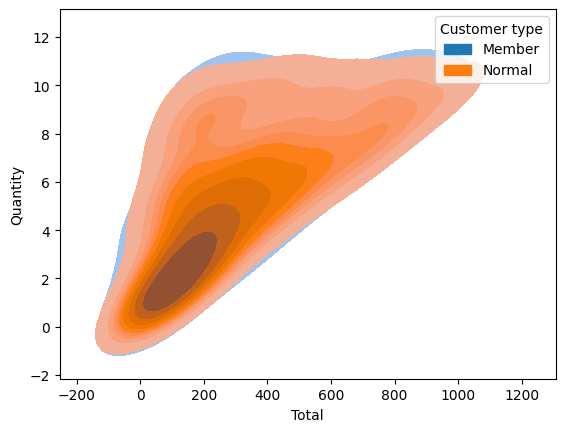

In [73]:
sns.kdeplot(data=dfc, x='Total', y='Quantity', hue='Customer type', fill=True)

we see that total quantities bought by both members and normal people are almost thesame

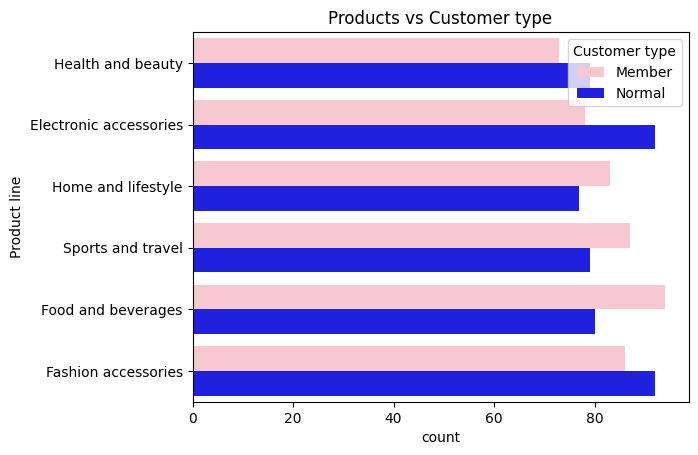

In [74]:
sns.countplot(data=dfc, y='Product line', hue='Customer type', palette=['pink', 'blue'])
plt.title('Products vs Customer type')
plt.show()

members bought mostly ' Food and beverages ' and 'sport and travel' products whereas normal customers spent most on 'Electronics accessories' and 'Fashion accessories'

- ### The distribution of sales across different genders

<Axes: xlabel='Total', ylabel='Quantity'>

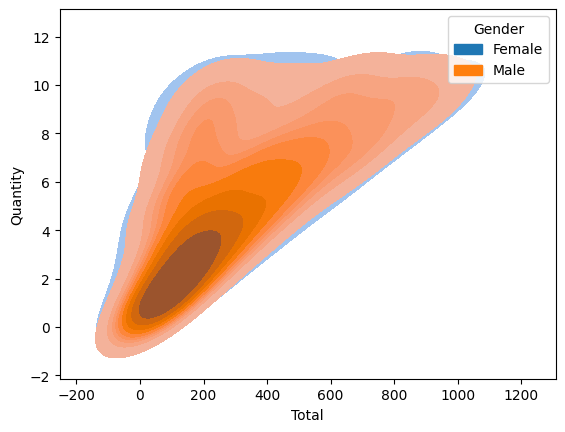

In [75]:
sns.kdeplot(data=dfc, x='Total', y='Quantity', hue='Gender', fill=True)

both gender had almost equall expenditure

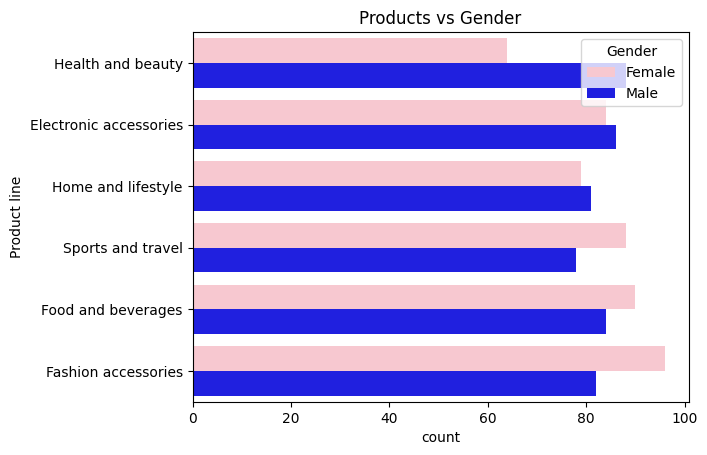

In [76]:
sns.countplot(data=dfc, y='Product line', hue='Gender', palette=['pink', 'blue'])
plt.title('Products vs Gender')
plt.show()

 ###  Unexpectedly, the Male customers spent on Health and beauty products more than the Female customers
 ### Otherwise, the spending on other product lines is almost the same for Male and Female customers
 ### and also females mostly spent on Fashion accessories

 - ## The payment method that is most frequently utilized

Text(0.5, 1.0, 'Payment Channel')

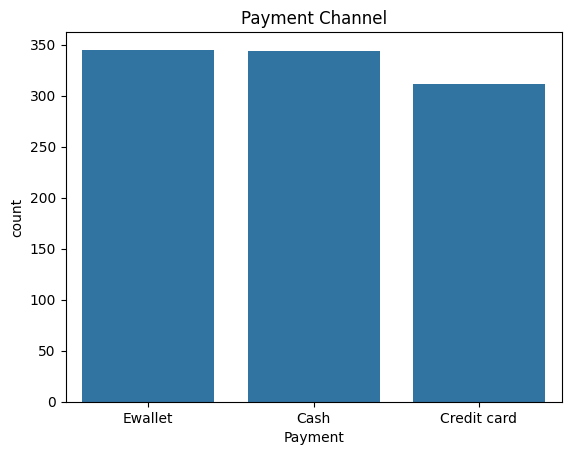

In [77]:
 sns.countplot(x="Payment", data =dfc).set_title("Payment Channel")

Most of the customers payed through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card. 

Text(0.5, 1.0, 'Payment Channel by Branch')

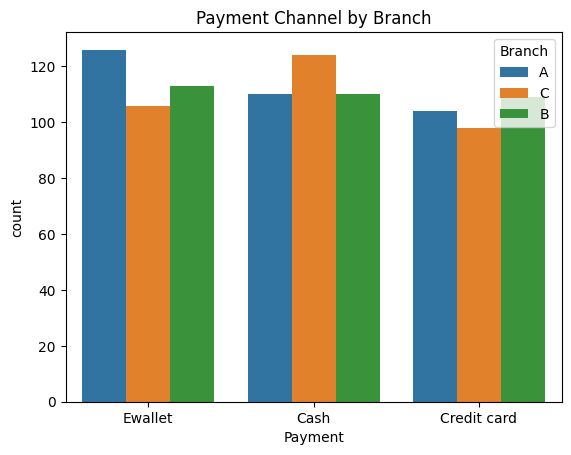

In [78]:
# pqyment methods across each branch
sns.countplot(x="Payment", hue = "Branch", data =dfc).set_title("Payment Channel by Branch") 

### the Ewallet was the most used payment method in branch A
### Cash payment was the most used payment method in branch B
### the Ewallet was the most used payment method in branch c 

## 5.Performing Predictive Analysis
I will be developing a predictive model for sales, utilizing the information provided in the dataframe. The model will aim to accurately forecast sales.
Here are the steps I will undertake:

- Managing Categorical Columns
- Partitioning the Data into Features and Target
- Identifying the Most Appropriate Machine Learning Algorithm for Our Data
- Implementing the Selected Machine Learning Algorithm (Optimal Model)
- Making Predictions on Unseen Data
- Preserving the Model Using Joblib
- Designing a Graphical User Interface (GUI)

- ## Managing Categorical Columns

In [79]:
from sklearn.preprocessing import OrdinalEncoder

dfc_encoded = dfc.copy()

cat_cols = dfc.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    dfc_encoded[col]=oe.fit_transform(dfc_encoded[[col]])
    print(oe.categories_)

[array(['A', 'B', 'C'], dtype=object)]
[array(['Mandalay', 'Naypyitaw', 'Yangon'], dtype=object)]
[array(['Member', 'Normal'], dtype=object)]
[array(['Female', 'Male'], dtype=object)]
[array(['Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'], dtype=object)]
[array(['1/1/2019', '1/10/2019', '1/11/2019', '1/12/2019', '1/13/2019',
       '1/14/2019', '1/15/2019', '1/16/2019', '1/17/2019', '1/18/2019',
       '1/19/2019', '1/2/2019', '1/20/2019', '1/21/2019', '1/22/2019',
       '1/23/2019', '1/24/2019', '1/25/2019', '1/26/2019', '1/27/2019',
       '1/28/2019', '1/29/2019', '1/3/2019', '1/30/2019', '1/31/2019',
       '1/4/2019', '1/5/2019', '1/6/2019', '1/7/2019', '1/8/2019',
       '1/9/2019', '2/1/2019', '2/10/2019', '2/11/2019', '2/12/2019',
       '2/13/2019', '2/14/2019', '2/15/2019', '2/16/2019', '2/17/2019',
       '2/18/2019', '2/19/2019', '2/2/2019', '2/20/2019', '2/21/2019',
     

In [80]:
dfc_encoded.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,0.0,2.0,0.0,0.0,3.0,74.69,7,26.1415,548.9715,26.0,146.0,2.0,522.83,26.1415,9.1
1,2.0,1.0,1.0,0.0,0.0,15.28,5,3.8200,80.2200,87.0,23.0,0.0,76.40,3.8200,9.6
2,0.0,2.0,1.0,1.0,4.0,46.33,7,16.2155,340.5255,81.0,155.0,1.0,324.31,16.2155,7.4


- ##  Partitioning the Data into Features and Target

In [81]:
# Split the dataset into features (X) and the target variable (y)
X = dfc_encoded.drop('Total', axis=1)
y = dfc_encoded['Total']

 # Identifying the Most Appropriate Machine Learning Algorithm for Our Data
 The selection of an appropriate machine learning model is paramount as it ensures the use of the most efficient and precise algorithm for the best prediction outcomes. Here are the factors I considered before deciding on the model to use:

- **Objective:** My goal is to create a predictive model that can estimate the total sales of these supermarkets based on the provided dataset. This leads me towards **supervised learning**, which is divided into two categories: ‘**REGRESSION**’ and ‘**CLASSIFICATION**’.
- **Nature of the Prediction Value:** The value to be predicted is continuous data, hence my choice for **‘REGRESSION MODELS’**.
**Regression Models:** I will be employing various regression models to predict sales, including:
- Linear Regression
- Random Forest Regressor
- XGBoost Regressor
- Ridge Regression
- Lasso Regression

I will compare their performance using metrics such as Mean Squared Error **(MSE)**, Root Mean Squared Error **(RMSE)**, and Mean Absolute Error **(MAE)**.

- ## Determining which machine learning algorithms is suitable for our data

In [82]:
# Standardize numerical features to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# After scaling the features, save the scaler object
#with open('scaler.pkl', 'wb') as scaler_file:
   # pickle.dump(scaler, scaler_file)

#Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# **Linear Regression**
l_reg = linear_model.LinearRegression()
l_reg.fit(X_train, y_train)
y_pred_l = l_reg.predict(X_test)
rmse_l = np.sqrt(mean_squared_error(y_test,y_pred_l))
mae_l = mean_absolute_error(y_test, y_pred_l)

                            

# Random forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)



                             



# XGBoost Regressor
# Create DMatrix for X_train and X_test
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)
# Define XGBoost parameters (you can adjust these as needed)
params = {
  'objective': 'reg:squarederror',  # Regression task
  'eval_metric': 'rmse',  # RMSE as evaluation metric
  'eta': 0.1,  # Learning rate
  'max_depth': 6,  # Maximum depth of trees
  'subsample': 0.8,  # Fraction of samples used for training
  'colsample_bytree': 0.8  # Fraction of features used for training
}
# Train the XGBoost model
xgb_reg = xgb.train(params, dtrain, num_boost_round=100)
# Make predictions on the test data
y_pred_xgb = xgb_reg.predict(dtest)
# Calculate RMSE and MAE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
# Save the trained XGBoost model as a pickle file






# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)





# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

#  Calculate Evaluation Metrics

In [83]:
# Calcuate evaluation mrteics for Linear Regression
with open('lnr_model.pkl', 'wb') as file:
    pickle.dump(l_reg, file)
with open('lnr_model.pkl', 'rb') as file:
    lnr_model = pickle.load(file) 

mae_lnr = mean_absolute_error(y_test, lnr_model.predict(X_test))
mse_lnr = mean_squared_error(y_test, lnr_model.predict(X_test))
rmse_lnr = np.sqrt(mse_lnr)
r2_lnr = r2_score(y_test, lnr_model.predict(X_test))
mape_lnr = mean_absolute_percentage_error(y_test, lnr_model.predict(X_test))


# Print the evaluation metrics
print("linear Regression Evaluation Metrics:")
print("MAE:", mae_lnr)
print("MSE:", mse_lnr)
print("RMSE:", rmse_lnr)
print("R-squared (R2):", r2_lnr)
print("Mean Absolute Percentage Error (MAPE):", mape_lnr)



linear Regression Evaluation Metrics:
MAE: 1.3708145729651733e-13
MSE: 3.07564245171189e-26
RMSE: 1.7537509662753974e-13
R-squared (R2): 1.0
Mean Absolute Percentage Error (MAPE): 8.51047172547336e-16


In [84]:
# Calculate evaluation metrics for XGBoost
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_reg, file)
with open('xgb_model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)    

mae_xgb = mean_absolute_error(y_test, xgb_model.predict(dtest))
mse_xgb = mean_squared_error(y_test, xgb_model.predict(dtest))
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, xgb_model.predict(dtest))
mape_xgb = mean_absolute_percentage_error(y_test, xgb_model.predict(dtest))


# Print the evaluation metrics
print("XGBoost Evaluation Metrics:")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R-squared (R2):", r2_xgb)
print("Mean Absolute Percentage Error (MAPE):", mape_xgb)

XGBoost Evaluation Metrics:
MAE: 1.7927582011032097
MSE: 9.5796014118613
RMSE: 3.0950931184475374
R-squared (R2): 0.9998527551840879
Mean Absolute Percentage Error (MAPE): 0.009177300202678257


In [85]:
# Calculate evaluation metrics for Random Forest (rf)
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)
with open('rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

mae_rf = mean_absolute_error(y_test, rf_model.predict(X_test))
mse_rf = mean_squared_error(y_test, rf_model.predict(X_test))
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_model.predict(X_test))
mape_rf = mean_absolute_percentage_error(y_test, rf_model.predict(X_test))

# print evaluation metrics for Random Forest (RF)
print("Random Forest Evaluation Metrics:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared (R2):", r2_rf)
print("Mean Absolute Percentage Error (MAPE):", mape_rf)

Random Forest Evaluation Metrics:
MAE: 0.7692478499999982
MSE: 1.8463712603333096
RMSE: 1.358812444869898
R-squared (R2): 0.9999716200513316
Mean Absolute Percentage Error (MAPE): 0.00457512918846384


In [86]:
# Calculate evaluation metrics for Lasso Regression 
with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso_reg, file)
with open('lasso_model.pkl', 'rb') as file:
    lasso_model = pickle.load(file)

mae_lasso = mean_absolute_error(y_test, lasso_model.predict(X_test))
mse_lasso = mean_squared_error(y_test, lasso_model.predict(X_test))
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, lasso_model.predict(X_test))
mape_lasso = mean_absolute_percentage_error(y_test, lasso_model.predict(X_test))

# Visualize evaluation metrics for Lasso Regression
print("Lasso Regression Evaluation Metrics:")
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R-squared (R2):", r2_lasso)
print("Mean Absolute Percentage Error (MAPE):", mape_lasso)


Lasso Regression Evaluation Metrics:
MAE: 0.8713621737291724
MSE: 1.128558937967284
RMSE: 1.0623365464706955
R-squared (R2): 0.9999826533019567
Mean Absolute Percentage Error (MAPE): 0.006654621564981998


In [87]:
# Calculate evaluation metrics for Ridge Regression
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ridge_reg, file)

with open('ridge_model.pkl', 'rb') as file:
    ridge_model = pickle.load(file)
    
mae_ridge = mean_absolute_error(y_test, ridge_model.predict(X_test))
mse_ridge = mean_squared_error(y_test, ridge_model.predict(X_test))
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, ridge_model.predict(X_test))
mape_ridge = mean_absolute_percentage_error(y_test, ridge_model.predict(X_test))

# Visualize evaluation metrics for Ridge Regression
print("Ridge Regression Evaluation Metrics:")
print("MAE:", mae_ridge)
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)
print("R-squared (R2):", r2_ridge)
print("Mean Absolute Percentage Error (MAPE):", mape_ridge)

Ridge Regression Evaluation Metrics:
MAE: 0.2184108401562613
MSE: 0.08681233266243625
RMSE: 0.2946393264016809
R-squared (R2): 0.9999986656369726
Mean Absolute Percentage Error (MAPE): 0.0022883124569975117


#  Compare and Select the Best Model

In [88]:
# Print RMSE and MAE for each model and compare their 
print("linear Regression - RMSE:", rmse_lasso, "MAE:", mae_lasso)
print("Random Forest - RMSE:", rmse_rf, "MAE:", mae_rf)
print("Ridge Regression - RMSE:", rmse_ridge, "MAE:", mae_ridge)
print("Lasso Regression - RMSE:", rmse_lasso, "MAE:", mae_lasso)
print("XGBoost - RMSE:", rmse_xgb, "MAE:", mae_xgb)


linear Regression - RMSE: 1.0623365464706955 MAE: 0.8713621737291724
Random Forest - RMSE: 1.358812444869898 MAE: 0.7692478499999982
Ridge Regression - RMSE: 0.2946393264016809 MAE: 0.2184108401562613
Lasso Regression - RMSE: 1.0623365464706955 MAE: 0.8713621737291724
XGBoost - RMSE: 3.0950931184475374 MAE: 1.7927582011032097


In [89]:
# Create a list of models and their RMSE and MAE values
models = ['linear Regression','Random Forest','Ridge Regression',  'Lasso Regression',  'XGBoost']
rmse_values = [1.062, 1.358,0.294, 1.0623,3.095]
mae_values = [0.871,0.769,0.218, 0.871,3.095]

# Rank the models based on RMSE and MAE
rmse_ranking = sorted(range(len(rmse_values)), key=lambda i: rmse_values[i])
mae_ranking = sorted(range(len(mae_values)), key=lambda i: mae_values[i])

# Print the ranked models
print("Ranked Models based on RMSE:")
for i, idx in enumerate(rmse_ranking, start=1):
    print(f"{i}. {models[idx]} - RMSE: {rmse_values[idx]:.3f}")

print("\nRanked Models based on MAE:")
for i, idx in enumerate(mae_ranking, start=1):
    print(f"{i}. {models[idx]} - MAE: {mae_values[idx]:.3f}")

Ranked Models based on RMSE:
1. Ridge Regression - RMSE: 0.294
2. linear Regression - RMSE: 1.062
3. Lasso Regression - RMSE: 1.062
4. Random Forest - RMSE: 1.358
5. XGBoost - RMSE: 3.095

Ranked Models based on MAE:
1. Ridge Regression - MAE: 0.218
2. Random Forest - MAE: 0.769
3. linear Regression - MAE: 0.871
4. Lasso Regression - MAE: 0.871
5. XGBoost - MAE: 3.095


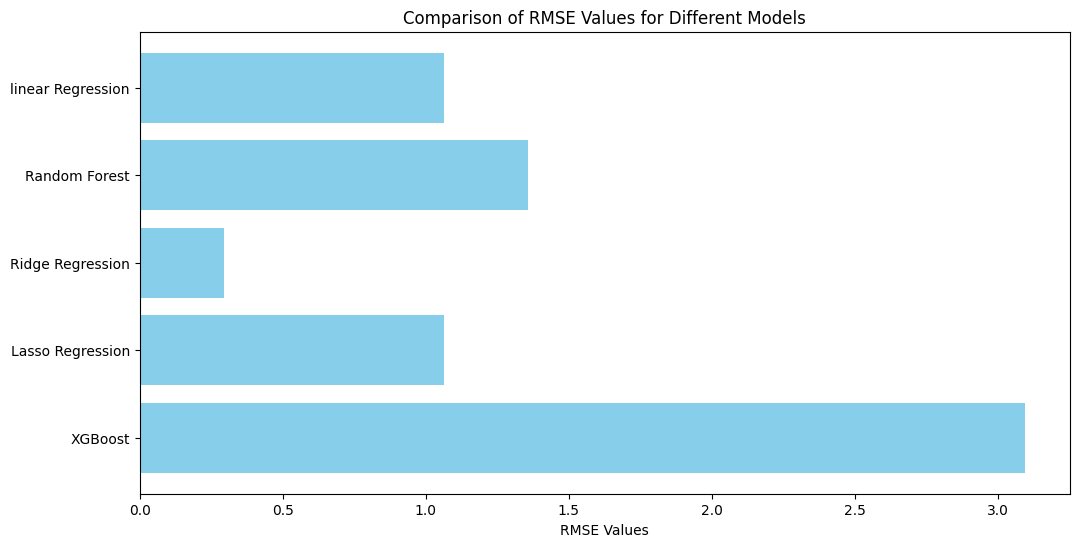

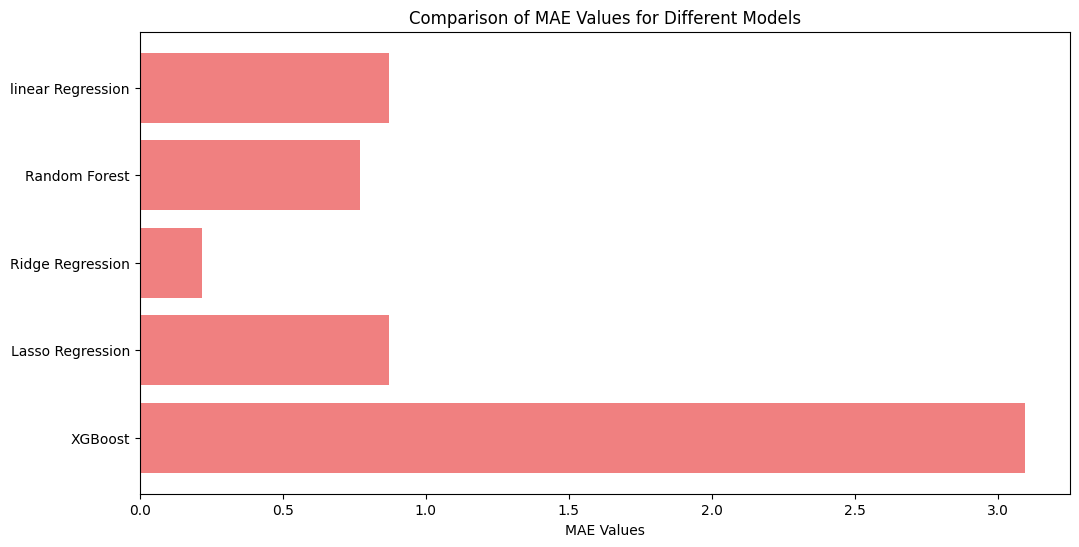

In [90]:
# List of model names
models = ['linear Regression','Random Forest','Ridge Regression',  'Lasso Regression',  'XGBoost']

# RMSE and MAE values for each model
rmse_values = [1.062, 1.358,0.294, 1.0623,3.095]
mae_values = [0.871,0.769,0.218, 0.871,3.095]

# Create bar plot for RMSE
plt.figure(figsize=(12, 6))
plt.barh(models, rmse_values, color='skyblue')
plt.xlabel('RMSE Values')
plt.title('Comparison of RMSE Values for Different Models')
plt.gca().invert_yaxis()  # Invert the y-axis to display the best model on top
plt.savefig('Comparison of RMSE Values for Different Models.png')
plt.show()

# Create bar plot for MAE
plt.figure(figsize=(12, 6))
plt.barh(models, mae_values, color='lightcoral')
plt.xlabel('MAE Values')
plt.title('Comparison of MAE Values for Different Models')
plt.gca().invert_yaxis()  # Invert the y-axis to display the best model on top
plt.savefig('Comparison of MAE Values for Different Models.png')
plt.show()

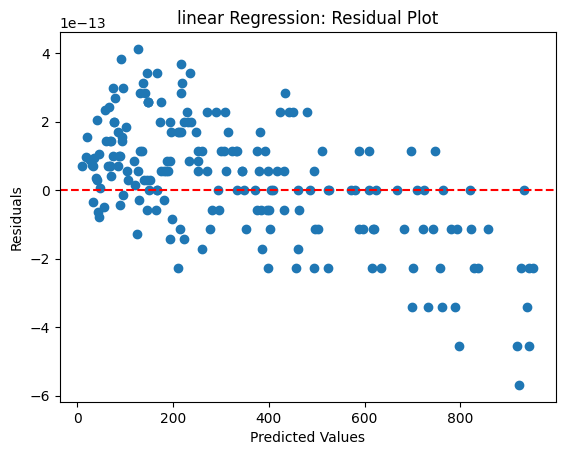

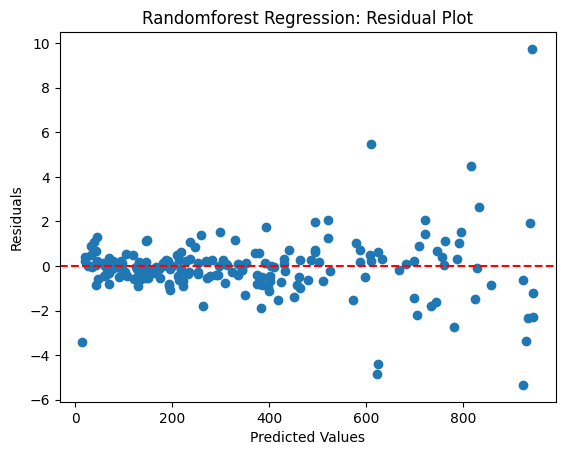

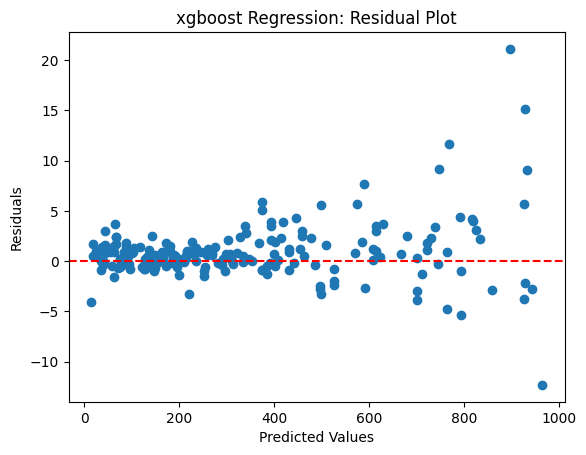

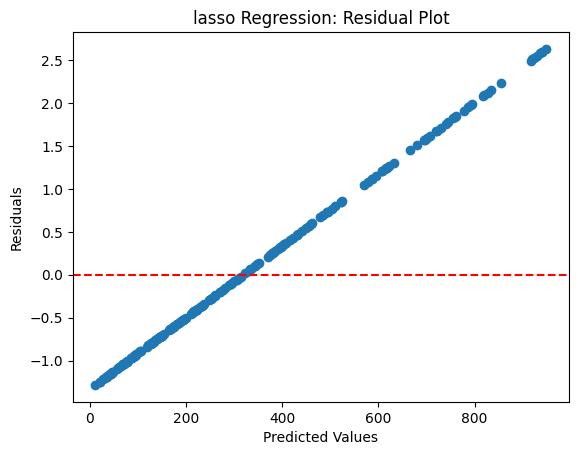

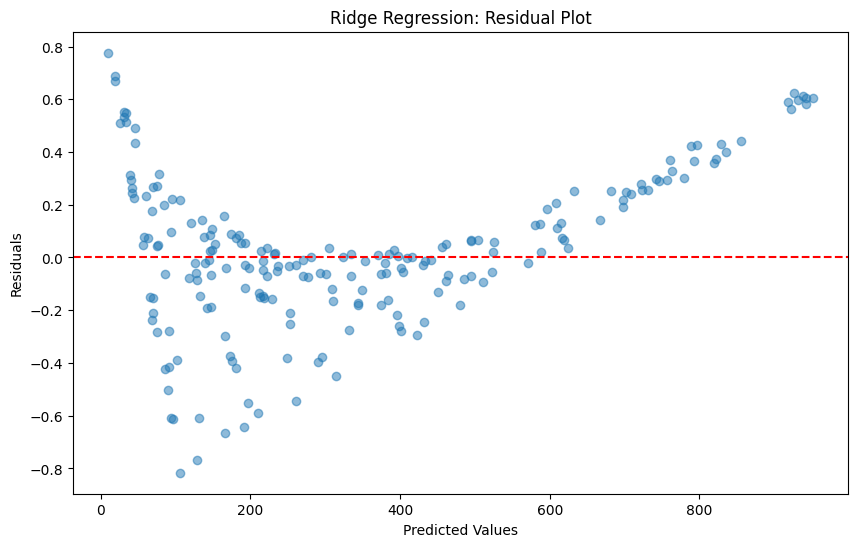

In [91]:
#linear Regression

y_pred =  l_reg.predict(X_test)
# Calculate the residuals
residuals = y_test - y_pred

# Create the residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('linear Regression: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()





#Randomforest Regression
y_pred =  rf_reg.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Create the residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Randomforest Regression: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

                             



# xgboost Regression

y_pred =  xgb_reg.predict(dtest)

# Calculate the residuals
residuals = y_test - y_pred

# Create the residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('xgboost Regression: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()





# Lasso Regression

y_pred = lasso_reg.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Create the residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('lasso Regression: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Calculate the residuals for Ridge Regression
ridge_residuals = y_test - ridge_reg.predict(X_test)

# Create a residual plot for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(ridge_reg.predict(X_test), ridge_residuals, alpha=0.5)
plt.title('Ridge Regression: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('ridge_residual_plot.png')
plt.show()


# Choosing the Best Model

In the process of building a sales prediction model, we evaluated several machine learning algorithms, each providing different levels of performance. Based on the evaluation metrics and thier performance with the the residual plot the most suiatable machine learning algorithm will be **RANDOM FOREST REGRESSION**

## Reason for Choosing Random forest  Regression
though its RMSE and MAE where not the lowest it performed excellent in the residual plot showing its predected values where closet to the actual values

In [92]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.9999630441401506


- ## Implementing the Selected Machine Learning Algorithm (Optimal Model)

XGBRFRegressor: This class is a variant of XGBRegressor that uses a random forest algorithm instead of gradient boosting2. Random forests consider a feature important if it results in a large decrease in impurity. In other words, features that lead to purer nodes have higher importance.

# selecting important features

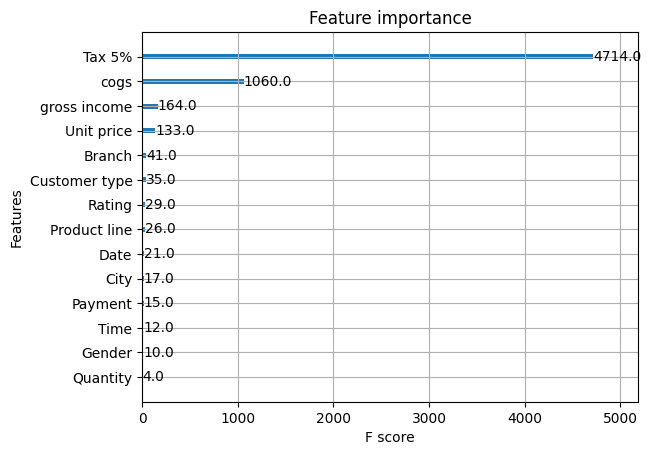

In [93]:
import xgboost as xgb
from xgboost import XGBRFRegressor
import matplotlib.pyplot as plt

# Assuming X_train, y_train, and X are defined elsewhere in your code
# X_train, y_train, X = ...

model1 = XGBRFRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

orig_feature_names = list(X.columns)
model1.get_booster().feature_names = orig_feature_names

xgb.plot_importance(model1, ax=plt.gca())
plt.show()

In [94]:
X.columns


Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Date', 'Time', 'Payment', 'cogs',
       'gross income', 'Rating'],
      dtype='object')

In [95]:
#eliminating features
final_X=X.drop(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
        'Quantity', 'Date', 'Time', 'Payment','Tax 5%',
       'Rating'],axis=1)

In [96]:
final_X


,Unit price,cogs,gross income
0,74.69,522.83,26.1415
1,15.28,76.40,3.8200
2,46.33,324.31,16.2155
3,58.22,465.76,23.2880
4,86.31,604.17,30.2085
...,...,...,...
995,40.35,40.35,2.0175
996,97.38,973.80,48.6900
997,31.84,31.84,1.5920
998,65.82,65.82,3.2910


## verifying RMSE and MAE of choosen ML algorithm

In [97]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_X)

#Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest Evaluation Metrics:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared (R2):", r2_rf)
print("Mean Absolute Percentage Error (MAPE):", mape_rf)


Random Forest Evaluation Metrics:
MAE: 0.5859472499999887
MSE: 1.8463712603333096
RMSE: 0.9511902530238173
R-squared (R2): 0.9999716200513316
Mean Absolute Percentage Error (MAPE): 0.00457512918846384


we can see a decrease in the value of RMSE and MAE after reducing the numbers of features

- ## Making Predictions on Unseen Data
  

In [98]:
pred = rf_reg.predict(np.array([[74,522,26,]]))
print(pred)
print(f"Sales Value is between {pred- 586} and {pred+ 5856}")

[1040.6088]
Sales Value is between [454.6088] and [6896.6088]


- ##  Preserving the Model Using Joblib


In [99]:
joblib.dump(rf_reg,'Supermarket_model')

['Supermarket_model']

In [100]:
model = joblib.load('Supermarket_model')

In [101]:
pred = rf_reg.predict(np.array([[74,522,26,]]))
print(pred)

[1040.6088]


In [102]:
print(f"Sales Value is between {pred- 0.5859472499999887} and {pred+ 0.5859472499999887}")

Sales Value is between [1040.02285275] and [1041.19474725]


- ##  Designing a Graphical User Interface (GUI)

In [103]:
current_year = dt.datetime.today().year

def show_entry_fields(Supermarket_model, features):
    inputs = [float(entry.get()) for entry in features]
    
    model = joblib.load('Supermarket_model')
    result = model.predict(np.array([inputs]))[0]
    
    Label(master, text="Sales Amount is in between").grid(row=8)
    Label(master, text=float(result) - 0.5859472499999887).grid(row=10)
    Label(master, text="and").grid(row=11)
    Label(master, text=float(result) +  0.5859472499999887).grid(row=12)
    print("Sales amount", result)

master = Tk()
master.title("Supermarket Sales Prediction using Machine Learning")

Label(master, text="Supermarket Sales Prediction using ML", bg="black", fg="white").grid(row=0, columnspan=2)

feature_names = ["cogs", "gross income", "Unit price"]
entries = []

for i, feature in enumerate(feature_names):
    Label(master, text=feature).grid(row=i+1)
    entry = Entry(master)
    entry.grid(row=i+1, column=1)
    entries.append(entry)

Button(master, text='Predict', command=lambda: show_entry_fields('Supermarket_model', entries)).grid(row=len(feature_names)+1, column=0)

master.mainloop()